In [22]:
import pandas as pd
import os
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from nltk import Tree,ParentedTree
%matplotlib inline
init_notebook_mode(connected=True) 

In [23]:
df = pd.read_csv("Details.csv")

In [24]:
df

,Name of company visited,CTC,Tier,Date that the company has come
0,Cure.Fit,"3,100,000",1,7/19/2019
1,Cisco,"2,917,633",1,7/20/2019
2,Thoughtspot,"3,400,000",1,7/22/2019
3,Intuit,"2,516,750",1,7/24/2019
4,Morgan Stanley,"2,533,000",1,7/25/2019
5,Goldman Sachs,"1,600,000",1,7/27/2019
6,Couch Base,"2,000,000",1,7/29/2019
7,Palo Alto,"2,212,000",1,8/1/2019
8,Novartis,"711,000",1,8/3/2019
9,Clumio,"2,000,000",1,8/5/2019


In [25]:
import datetime
datetime.datetime.strptime("9/9/2019","%m/%d/%Y")
dates = list(df['Date that the company has come'])
dates = [datetime.datetime.strptime(i,"%m/%d/%Y") for i in dates]

In [26]:
dates = list(df['Date that the company has come'])
dates = [datetime.datetime.strptime(i,"%m/%d/%Y") for i in dates]
df['Date that the company has come'] = dates
df = df.sort_values(by='Date that the company has come')

In [27]:
df = df.reset_index(drop=True)

In [28]:
df

,Name of company visited,CTC,Tier,Date that the company has come
0,Cure.Fit,"3,100,000",1,2019-07-19
1,Cisco,"2,917,633",1,2019-07-20
2,Thoughtspot,"3,400,000",1,2019-07-22
3,Intuit,"2,516,750",1,2019-07-24
4,Morgan Stanley,"2,533,000",1,2019-07-25
5,Goldman Sachs,"1,600,000",1,2019-07-27
6,MuSigma,"350,000",3,2019-07-28
7,Couch Base,"2,000,000",1,2019-07-29
8,Palo Alto,"2,212,000",1,2019-08-01
9,Novartis,"711,000",1,2019-08-03


In [29]:
trace1=go.Scatter(x=df['Date that the company has come'],y=df['CTC'],mode = 'lines+markers',
        hovertext = df['Name of company visited'],
        marker = dict(
                color = 'blue'
                ))
data = [trace1]
layout = dict(
    title='CTC of companies over time',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(count=1,
                    label='YTD',
                    step='year',
                    stepmode='todate'),
                dict(count=1,
                    label='1y',
                    step='year',
                    stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
)
fig = dict(data=data, layout=layout)
iplot(fig)
print('Move the slider to get deeper understanding of the CTC per day/week/month')



Move the slider to get deeper understanding of the CTC per day/week/month


In [30]:
ctc = df['CTC']
dates = df['Date that the company has come']


In [31]:
from collections import Counter
tier = dict(Counter(df['Tier']))
data = [go.Bar(x=list(tier.keys()),y=list(tier.values()))]
layout = dict(title='Tier based division of companies',xaxis=dict(title="Tier"),
              yaxis = dict(title = "Number of companies"))
fig = go.Figure(data=data,layout=layout)
iplot(fig)

{'Cure.Fit': 3100000.0, 'Cisco': 2917633.0, 'Thoughtspot': 3400000.0, 'Intuit': 2516750.0, 'Morgan Stanley': 2533000.0, 'Goldman Sachs': 1600000.0, 'MuSigma': 350000.0, 'Couch Base': 2000000.0, 'Palo Alto': 2212000.0, 'Novartis': 711000.0, 'Zscaler': 2092000.0, 'Clumio': 2000000.0, 'Schneider Electric': 650000.0, 'Akamai': 1630000.0, 'Hewlett Packard': 900000.0, 'Walmart': 1857700.0, 'PWC': 843000.0, 'Infibeam': 1000000.0, 'Logmein': 1582000.0, 'Perpule': 1400000.0, 'Gartner': 1067646.0, 'Danske IT': 1100000.0, 'Optum': 1159400.0, 'General Electric': 940000.0, 'Epsilon': 1000000.0, 'Societe Generale': 1225000.0, 'Deloitte USI': 760000.0, 'Nuclei': 1600000.0, 'Exotel': 1700000.0, 'IBM': 1100000.0, 'Mathworks': 1275000.0, 'Komprise': 1900000.0, 'Standard Chartered GBS': 610000.0, 'Deloitte India': 620000.0, 'Accenture': 425000.0, 'SIXT R & D': 1000000.0, 'Commvault': 1550000.0, 'VM Ware': 700000.0, 'Robert Bosch': 500000.0, 'NetSkope': 1400000.0, 'Prodapt Solutions': 550000.0, 'McAfee': 

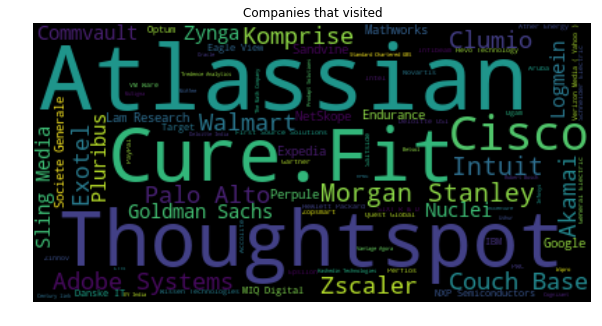

In [32]:
d = {}
df = df.reset_index(drop=True)
for i in range(len(df)):
    d[df['Name of company visited'][i]] = float(df["CTC"][i].replace(',',''))
print(d)
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud()
wordcloud.generate_from_frequencies(frequencies=d)

plt.figure(figsize = (10,10),facecolor=None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Companies that visited')
plt.show()

In [33]:
from plotly.subplots import make_subplots
fig = make_subplots(rows=3, cols=2,subplot_titles=('July',"August","September","October","November"))
current=1
current_col = 1
for i in range(8,13):
    modified = df[(df['Date that the company has come']<datetime.datetime.strptime("2019-"+str(i)+"-01","%Y-%m-%d")) & (df['Date that the company has come']>datetime.datetime.strptime("2019-"+str(i-1)+"-01","%Y-%m-%d"))]
    #print('modified',modified)
    if(len(modified)):
        tier = dict(Counter(modified['Tier']))
        #print(current,current_col)
        fig.add_trace(go.Bar(x=list(tier.keys()),y=list(tier.values()),hovertext=list(tier.values())),row = current,col = current_col)
        current_col+=1
        #print(current,current_col)
        if(current_col==3):
            current_col=1
            current+=1
fig.update_layout(showlegend=False,height=1000,width=800,title="Tier division for different months") 


fig.update_yaxes(title_text="Number of companies", row=1, col=1)
fig.update_yaxes(title_text="Number of companies", row=1, col=2)
fig.update_yaxes(title_text="Number of companies", row=2, col=1)
fig.update_yaxes(title_text="Number of companies", row=2, col=2)
fig.update_yaxes(title_text="Number of companies", row=3, col=1)

fig.update_xaxes(title_text="Tier", row=1, col=1)
fig.update_xaxes(title_text="Tier", row=1, col=2)
fig.update_xaxes(title_text="Tier", row=2, col=1)
fig.update_xaxes(title_text="Tier", row=2, col=2)
fig.update_xaxes(title_text="Tier", row=3, col=1)
iplot(fig)

In [34]:
import requests
from bs4 import BeautifulSoup
import wikipedia

def get_wiki_summary(page_soup):
    summary = ""
    paragraphs = page_soup.findAll()
    for paragraph in paragraphs:
        if paragraph.name == "p":
            summary += paragraph.text + " "
            #print("Adding summary")
        elif paragraph.name == "div" and paragraph.has_attr('class') and paragraph['class'][0] == 'toc':
            break

    #print(summary)
    return summary


def get_wiki_company_categories(page_soup):
    categories = []
    table_html = str(page_soup.find("table", {"class": "infobox vcard"}))
    if table_html == "None":
        #print("Returning none")
        return categories
    soup_table = BeautifulSoup(table_html, 'html.parser')
    td_list = soup_table.findAll("td", {"class": "category"})

    for item in td_list:
        if item.previous_sibling is not None and item.previous_sibling.text == "Industry":
            a_tag_list = BeautifulSoup(str(item), 'html.parser').findAll("a")
            for tag in a_tag_list:
                categories.append(tag.text)

    #print(categories)
    return categories

def get_wiki_company_suggestions(page_title):
    suggestions = wikipedia.search(page_title)
    for item in suggestions:
        if item.lower() == page_title.lower():
            categories_list = wikipedia.WikipediaPage(item).categories
            for category in categories_list:
                if "companies" or "company" in category:
                    return item 
            return None
    return None




def get_wiki_info(page_title):  
    response = requests.get("https://en.wikipedia.org/wiki/"+page_title)
    if response.status_code != 200:
        suggestion = get_wiki_company_suggestions(page_title)
        if suggestion == None:
            return [None, None]
        response = requests.get("https://en.wikipedia.org/wiki/"+suggestion)        

    page_html = response.content
    page_soup = BeautifulSoup(page_html, 'html.parser')
    
    summary = get_wiki_summary(page_soup)

    categories = get_wiki_company_categories(page_soup)

    return [summary, categories]


In [35]:
company_names = list(df['Name of company visited'])
categories = []
for i in company_names:
    b = get_wiki_info(i)
    #print(i,end=' ')
    if(b[1]!=None and b[1]!=[]):
        print(b[1][0])
        categories.append(b[1][0])
    else:
        categories.append('Others')

Networking hardware
Analytics
Enterprise software
Financial services
Financial services
Pharmaceuticals
Network security
Electrical equipment
Internet
Computer hardware
Retail
Professional services
Internet
Computer software
Conglomerate
Financial services
Telecommunications
Cloud computing
Professional services
Information technology
Computer software
IT services
Automotive
IT services
Conglomerate
Internet
Semiconductors
Placeshifting
Semiconductors
Computer software
Software
Video game industry
Professional services
Financial services
Electronics


In [36]:
print(list(set(categories)))
df['category']=categories
df.to_csv('detail.csv',index=False)

['Computer hardware', 'Electrical equipment', 'Others', 'Network security', 'Conglomerate', 'Financial services', 'Automotive', 'Cloud computing', 'Placeshifting', 'Video game industry', 'Internet', 'Analytics', 'Information technology', 'Networking hardware', 'Retail', 'Enterprise software', 'IT services', 'Telecommunications', 'Computer software', 'Electronics', 'Professional services', 'Semiconductors', 'Software', 'Pharmaceuticals']


In [38]:
counts = (Counter(categories))
del counts['Others']
a = counts.most_common()
x_value=[]
y_value=[]
for i in a:
    x_value.append(i[0])
    y_value.append(i[1])
print(a)
data = [go.Bar(x=x_value,y=y_value)]
layout = dict(title='Different Company categories',xaxis=dict(title="Company categories"),
              yaxis = dict(title = "Number of companies"))
fig = go.Figure(data=data,layout=layout)
    
iplot(fig)

[('Financial services', 4), ('Internet', 3), ('Professional services', 3), ('Computer software', 3), ('Conglomerate', 2), ('IT services', 2), ('Semiconductors', 2), ('Networking hardware', 1), ('Analytics', 1), ('Enterprise software', 1), ('Pharmaceuticals', 1), ('Network security', 1), ('Electrical equipment', 1), ('Computer hardware', 1), ('Retail', 1), ('Telecommunications', 1), ('Cloud computing', 1), ('Information technology', 1), ('Automotive', 1), ('Placeshifting', 1), ('Software', 1), ('Video game industry', 1), ('Electronics', 1)]


In [39]:
df

,Name of company visited,CTC,Tier,Date that the company has come,category
0,Cure.Fit,"3,100,000",1,2019-07-19,Others
1,Cisco,"2,917,633",1,2019-07-20,Networking hardware
2,Thoughtspot,"3,400,000",1,2019-07-22,Analytics
3,Intuit,"2,516,750",1,2019-07-24,Enterprise software
4,Morgan Stanley,"2,533,000",1,2019-07-25,Financial services
5,Goldman Sachs,"1,600,000",1,2019-07-27,Financial services
6,MuSigma,"350,000",3,2019-07-28,Others
7,Couch Base,"2,000,000",1,2019-07-29,Others
8,Palo Alto,"2,212,000",1,2019-08-01,Others
9,Novartis,"711,000",1,2019-08-03,Pharmaceuticals


In [40]:
import random
random.randint(1,10)

7

In [41]:
num_of_people = []
for i in range(len(df)):
    p = random.randint(1,15)
    num_of_people.append(random.randint(1,p))

In [42]:
df['number']=num_of_people

In [43]:
df.to_csv('detail.csv',index=False)

In [ ]:
values=[]
for i in range(8,13):
    modified = df[(df['Date that the company has come']<datetime.datetime.strptime("2019-"+str(i)+"-01","%Y-%m-%d")) & (df['Date that the company has come']>datetime.datetime.strptime("2019-"+str(i-1)+"-01","%Y-%m-%d"))]
    #print('modified',modified)
    if(len(modified)):
        tier = sum(modified['number'])
        values.append(tier)

        
data = [go.Bar(x=['July','August','September','October','November'],y=values)]
layout = dict(title='How many students are placed?',xaxis=dict(title="Month"),
              yaxis = dict(title = "Number of students"))
fig = go.Figure(data=data,layout=layout)
iplot(fig)

In [ ]:
values = []
for i in range(1,4):
    modified = df[df['Tier']==i]
    values.append(sum(modified['number']))

    
data = [go.Bar(x=['Tier-1','Tier-2','Tier-3'],y=values)]
layout = dict(title='Students composition based on company tiers',xaxis=dict(title="Month"),
              yaxis = dict(title = "Number of students"))
fig = go.Figure(data=data,layout=layout)
iplot(fig)


In [ ]:
data = [go.Box(x=df['CTC'],name='CTC offered',boxmean=True )]
layout = dict(title='CTC summary',xaxis=dict(title='CTC'))
fig = go.Figure(data=data,layout=layout)
iplot(fig)

In [ ]:
ctc = list(df['CTC'])
values =[]
results = ctc[2:]
results = [float(i.replace(',',''))/100000 for i in results]
for i in range(len(ctc)-1):
    values.append([float(ctc[i].replace(',',''))/100000,float(ctc[i+1].replace(',',''))/100000])

In [ ]:
values,results

In [ ]:
len(values)

In [ ]:
len(results)

In [ ]:
values.pop()

In [ ]:
import numpy as np
train_x = np.array(values[:70])
train_y = np.array(results[:70])
test_x = np.array(values[70:])
test_y = np.array(results[70:])

In [ ]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

n_features = 1
train_x = train_x.reshape((train_x.shape[0], train_x.shape[1], n_features))
# define model

In [275]:
model = Sequential()
model.add(LSTM(7, activation='relu', input_shape=(2, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(train_x, train_y, epochs=400, verbose=0)

In [276]:
test_x = test_x.reshape(test_x.shape[0],test_x.shape[1],n_features)

In [277]:
yhat = model.predict(test_x, verbose=1)


14/14 [==============================] - 1s 83ms/step


In [278]:
mses = ((test_y-yhat)**2).mean(axis=1)
import math
print(math.sqrt(sum(mses)/len(mses)))
yhat_train = model.predict(train_x, verbose=1)
mses = ((train_y-yhat_train)**2).mean(axis=1)
print(math.sqrt(sum(mses)/len(mses)))

12.829828691358376
70/70 [==============================] - 0s 195us/step
7.421393337151052


In [279]:
train_x
x_axis =[i for i in range(len(train_x)+len(train_y))]
trace1=go.Scatter(x=x_axis,y=list(yhat_train.reshape(len(yhat_train)))+list(yhat.reshape(len(yhat))),name='predicted',mode = 'lines+markers')
trace2=go.Scatter(x=x_axis,y=list(train_y.reshape(len(train_y)))+list(test_y.reshape(len(test_y))),name='actual',mode = 'lines+markers')
fig = go.Figure(data=[trace1,trace2])
iplot(fig)

In [280]:
train_y

array([34.     , 25.1675 , 25.33   , 16.     ,  3.5    , 20.     ,
       22.12   ,  7.11   , 20.92   , 20.     ,  6.5    , 16.3    ,
        9.     , 18.577  ,  8.43   , 10.     , 15.82   , 14.     ,
       10.67646, 11.     , 11.594  ,  9.4    , 10.     , 12.25   ,
        7.6    , 16.     , 17.     , 11.     , 12.75   , 19.     ,
        6.1    ,  6.2    ,  4.25   , 10.     , 15.5    ,  7.     ,
        5.     , 14.     ,  5.5    ,  6.     , 12.83964, 11.     ,
       12.     ,  4.37173,  4.     ,  5.     ,  4.     ,  7.25   ,
        7.     ,  8.     ,  6.     ,  6.     ,  5.5    ,  5.     ,
       13.55   ,  8.     , 12.49596,  6.     , 12.     ,  8.     ,
       14.     ,  6.     ,  8.     ,  9.     , 15.8    ,  8.     ,
        8.     , 11.     , 14.0126 , 10.     ])

In [281]:
yhat.reshape(len(yhat))

array([11.219369 ,  7.288872 ,  6.293934 , 13.422244 , 12.587708 ,
        9.155598 , 10.4906645,  6.996851 , 23.26411  , 26.538534 ,
       10.057629 , 11.569874 ,  9.856879 ,  6.714358 ], dtype=float32)

In [282]:
model.save('ctc_lstm.h5')